# Siparişler - `review_score` Çok Değişkenli Regresyonu

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ Devam etmeden önce:
* 💾 Önceki ünitenin Siparişler çözümünü indirin
* 👥 `order_solution.py`'nin içeriğini `olist/order.py` dosyasına kopyalayıp yapıştırın

⚠️ `olist` havuzunuzda `order.py` dosyasındaki kod değişikliklerini commit etmeyi unutmayın!

👇 Öncelikle `orders` veri setini içeri aktarın

In [9]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Önceki analizimizi hatırlayalım:

Aşağıdaki 👇 korelasyon matrisi üzerinden, `review_score`'un çoğunlukla iki özellik ile ilişkili olduğunu görebiliriz: `wait_time` ve `delay_vs_expected`. Ancak, bu iki özellik de birbirleriyle yüksek oranda ilişkilidirler.

Bu alıştırmada, bir özelliğin etkisini ayırt etmek için `statsmodels` kullanacağız, **diğer özellikleri sabit tutarak**.

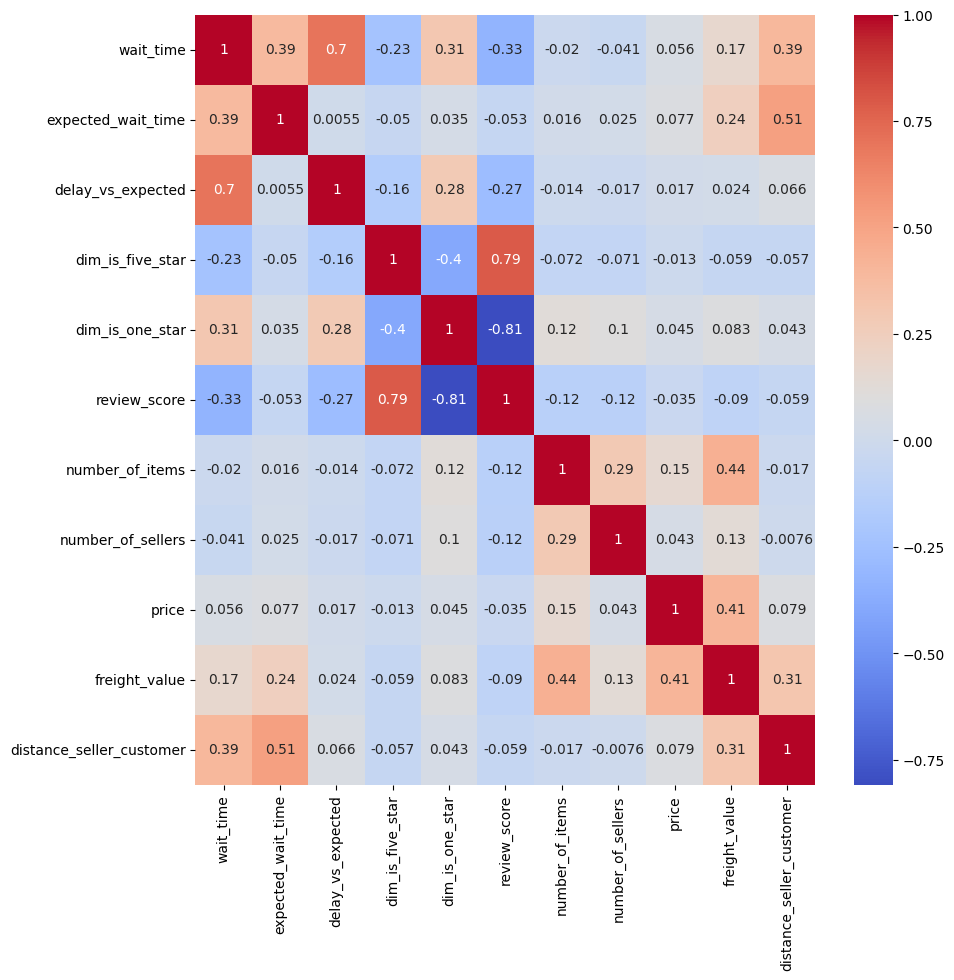

In [6]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(numeric_only=True),
    cmap='coolwarm',
    annot=True,
    annot_kws={"size": 10}
);

## 1 - Tek Değişkenli Regresyon

❓ [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) ile `statsmodels.formula.api` kullanarak hızlı bir şekilde şunları oluşturun:
 - `model1`: `review_score`'un `wait_time` üzerinde ols regresyonu
 - `model2`: `review_score`'un `delay_vs_expected` üzerinde ols regresyonu

Her biri için `summary` tablosunu yazdırın ve sonuçları yorumlayin:
- Bu sonuçların seaborn regplot sonuçları ile nasıl eşleştiğini anladığınızdan emin olun
- Regresyon performans metriği `R-squared`, `individual regression coefficients`, `t-values`, `p-values` ve `95% confidence intervals`'ı okuyun

***Model 1***:

In [10]:
import statsmodels.formula.api as smf
from olist.order import Order

# 1. Yeni veriyi yükle (mesafe bilgisiyle beraber)
order = Order()
data = order.get_training_data(with_distance_seller_customer=True)

# 2. Modeli kur ve eğit
model1 = smf.ols(formula='review_score ~ wait_time', data=data).fit()

# 3. Sonuçları yazdır
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Thu, 25 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:15:41   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.0

***Model 2***:

In [11]:
# 2. Modeli kur ve eğit
model2 = smf.ols(formula='review_score ~ delay_vs_expected', data=data).fit()

# 3. Sonuçları yazdır
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Thu, 25 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:15:51   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.00

## 2 - Çok Değişkenli Regresyon

❓ Siparişe bir gün `delay_vs_expected` eklemenin `review_score` üzerindeki etkisi nedir, **`wait_time` sabit tutarak**? İki özellikten hangisi düşük `review_score` için en açıklayıcıdır?

Bu amaçla, `wait_time` ve `delay_vs_expected`'in özellikler (bağımsız değişkenler) olduğu ve `review_score`'un hedef (bağımlı değişken) olduğu bir OLS modeli `model3`'ü çalıştırın

***Model 3***:

In [12]:
# Model 3: review_score ~ wait_time + delay_vs_expected
model3 = smf.ols(formula='review_score ~ wait_time + delay_vs_expected', data=data).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Thu, 25 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:16:44   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.00

----
👉 Çok değişkenli regresyon, bir özelliğin etkisini izole etmek ve diğer özelliklerin etkisini kontrol etmek için bize izin verir. Bu yeni katsayılara **`kısmi korelasyon katsayıları`** denir. 

❓ Yukarıda *seaborn* ile hesaplanan **basit regresyon** katsayıları ile fark görebilir misiniz? 

❓ `wait_time` ve `delay_vs_expected` için göreceli eğimler hakkında ne söyleyebilirsiniz?

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared oldukça düşük: review_score varyasyonlarının en fazla %12'si `wait_time` ve `delay_vs_expected`'in birleşik varyasyonları tarafından açıklanır.

✅ Doğrusal regresyonun açıklanabilirliğini iyileştirmek için regresyonumuza daha fazla özellik eklemeyi deneyelim.

Sonraki adımlarda `orders` veri setinden daha fazla özellik içeren yeni bir OLS `model4` oluşturacağız. Adım adım size rehberlik edeceğiz.

📝 <u>Not</u>: bir **`Çok Değişkenli Doğrusal Regresyon`** aynı zamanda **`Ordinary Least Squares`** yöntemi olarak da adlandırılır çünkü bu modelde **`MSE Ortalama Kare Hatalar`**'ı minimize etmek istiyoruz

***Model 4***:

❓ Hangi özellikleri göz önünde almak istersiniz?

👉 Bu özelliklerle bir `features` DataFrame oluşturun.

- ⚠️ **veri sızıntısı** oluşturmayın: `review_score`'tan doğrudan türetilen özellikleri eklemeyin
- ⚠️ Birbirleriyle mükemmel bir şekilde ilişkili olan iki özellik eklemeyin

In [15]:
import statsmodels.formula.api as smf

# 1. Özellik listesini belirleyelim
# Not: distance_seller_customer opsiyoneldir, eğer hesapladıysanız ekleyin.
features = [
    "wait_time", 
    "delay_vs_expected", 
    "number_of_items", 
    "number_of_sellers", 
    "price", 
    "freight_value",
    "distance_seller_customer" 
]

Sonra, özellikleri "standardize" edeceğiz.

**Bu ne anlama gelir?**

⚖️  Her özellik $X_i$'yi ilgili z-score'una $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ dönüştüreceğiz.

**Neden?**

Bir `çok değişkenli doğrusal regresyon`'da, her özelliğin hedef üzerindeki etkisini ölçmeye çalışıyoruz.
    
⚠️ Ölçek etkileri nedeniyle, bazı özellikler yanlışlıkla diğerlerinden daha önemli olarak görülecektir
    
> Örneğin: "yatak odası sayısı" özelliği 1 ile 5 arasında ve "yüzey" özelliği 20 ile 200 m² arasında ise, bu iki özelliğin aralıkları oldukça farklıdır...

Bu nedenle kısmi regresyon katsayıları $\beta_i$'yi birlikte karşılaştırabilmek için standardize ederiz. Aksi takdirde, $\beta_i$ aynı boyuta sahip olmayacak, yani elmalar (örn. "gün başına review-yıldızlar") ile portakalları (örn. "BRL başına review-yıldızlar") karşılaştırmış olacaksınız!

📅 Makine Öğrenmesi Algoritmalarını keşfettiğimizde, herhangi bir hedefi tahmin etmeye çalışmadan önce bazı ölçekleme işlemleri gerçekleştirmemiz gerekecektir.

👉  Özelliklerinizi standardize edin:

1. `features` DataFrame'inizden başlayın
1. `mean`'i çıkarın
1. Standart sapma `std`'ye bölün.
1. Sonucu `orders_standardized` değişkenine kaydedin.
1. Son olarak, `orders['review_score']` sütununu `orders_standardized`'e kopyalayın.

2. ve 3. adımları basit bir matematiksel işlem olarak yazabilirsiniz, hatta DataFrames ile de. Pandas bunu anlamak için yeterince akıllıdır.

<details>
  <summary><i>İpucu</i></summary>

  ```python
  features - features.mean() / features.std()
  ```

</details>

👉 `model4`'ü oluşturun ve eğitin.

In [16]:
# 1. Özellikleri seçip 'features' DataFrame'ini oluşturalım
# (Önceki adımda belirlediğimiz listeyi kullanıyoruz)
selected_features = [
    "wait_time", 
    "delay_vs_expected", 
    "number_of_items", 
    "number_of_sellers", 
    "price", 
    "freight_value",
    "distance_seller_customer" # Eğer hesapladıysanız
]

X = data[selected_features]

# 2. ve 3. Adım: Standartlaştırma (Z-score hesaplama)
# (Değer - Ortalama) / Standart Sapma
orders_standardized = (X - X.mean()) / X.std()

# 4. Hedef değişkeni geri ekleyelim
orders_standardized['review_score'] = data['review_score']

# Kontrol edelim (Ortalamalar 0'a, standart sapmalar 1'e yakın olmalı)
print(orders_standardized.describe().round(2))

       wait_time  delay_vs_expected  number_of_items  number_of_sellers  \
count   95872.00           95872.00         95872.00           95872.00   
mean        0.00               0.00            -0.00               0.00   
std         1.00               1.00             1.00               1.00   
min        -1.27              -0.16            -0.26              -0.11   
25%        -0.61              -0.16            -0.26              -0.11   
50%        -0.24              -0.16            -0.26              -0.11   
75%         0.33              -0.16            -0.26              -0.11   
max        20.71              40.42            37.06              32.24   

          price  freight_value  distance_seller_customer  review_score  
count  95872.00       95872.00                  95872.00      95872.00  
mean       0.00          -0.00                     -0.00          4.16  
std        1.00           1.00                      1.00          1.29  
min       -0.65          -1.06  

---
❓ En önemli özellikler nelerdir? (onları iyi görselleştirmek için `.plot(kind='barh')` ile bir çubuk grafik yapın)
- Genel regresyon performansı nasıl değişti?
- Bu regresyon istatistiksel olarak anlamlı mıdır?

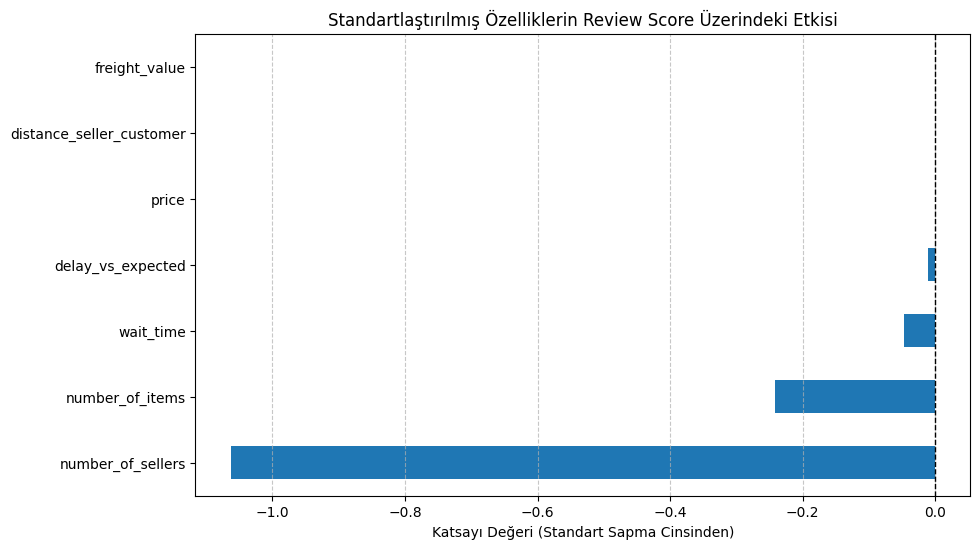

R-squared: 0.145
F-statistic p-value: 0.00e+00


In [18]:
import matplotlib.pyplot as plt

# 1. Katsayıları (Coefficients) alalım
params = model4.params

# 2. 'Intercept' (Sabit terim) görselleştirmeyi bozar, onu çıkaralım
params = params.drop("Intercept")

# 3. Katsayıları büyüklüklerine göre sıralayalım
params = params.sort_values()

# 4. Çubuk grafiği (Bar Plot) çizelim
plt.figure(figsize=(10, 6))
params.plot(kind='barh')

plt.title("Standartlaştırılmış Özelliklerin Review Score Üzerindeki Etkisi")
plt.xlabel("Katsayı Değeri (Standart Sapma Cinsinden)")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # 0 noktasına çizgi
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# İstatistiksel Özet
print(f"R-squared: {model4.rsquared:.3f}")
print(f"F-statistic p-value: {model4.f_pvalue:.2e}")

<details>
    <summary>- 💡 Açıklamalar 💡 -</summary>
    

- `wait_time` en büyük açıklayıcı değişkendir
- Tek bir sipariş için ne kadar çok `items` ve `sellers` varsa, `review_score` o kadar düşük görünür
- Mesafe de müşteri memnuniyetinde rol oynar.
- Özellik seçiminize bağlı olarak, `price` ve `freight_value` hakkında p-değerleri çok yüksekse hiçbir sonuca varamayabilirsiniz
    
- Genel olarak, bu çok değişkenli regresyon, F-istatistiği 1'den çok daha büyük olduğu için istatistiksel olarak anlamlı kalır (en az bir özelliğin çok düşük p-değeri vardır)

- R-squared çok fazla artmadı. `review_score`'un açıklanabilirliğinin çoğu orders veri seti dışında yer alır.

⚠️ Gözlem sayısı (n) özellik sayısından (p) çok daha yüksek olduğunda düşük R-squared yaygındır. Böyle regresyonlardan, istatistiksel olarak anlamlı olması koşuluyla yine de ilgili içgörüler elde edilebilir.
</details>



## 3 - Model Performansını Kontrol Edin

⚠️ Regresyon performansı sadece R-squared'i ile ölçülmemelidir!

👀 Her zaman tahminlerin dağılımını, özellikle de kalıntıları görselleştirin.

❓ Kalıntıları hesaplayın.

Kalıntıların ortalamasının 0'a eşit olduğunu görmelisiniz (doğrusal regresyon yapılırken bunu her zaman doğrulayın)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Kalıntıları (Residuals) modelden doğrudan alabiliriz
residuals = model4.resid

# Alternatif olarak elle hesaplamak isterseniz:
# predictions = model4.predict(orders_standardized)
# residuals = orders_standardized['review_score'] - predictions

# 2. Kalıntıların ortalamasını yazdır (0'a çok yakın olmalı)
print(f"Kalıntıların Ortalaması: {residuals.mean():.10f}")

Kalıntıların Ortalaması: -0.0000000000


🧮 İlişkili RMSE'yi hesaplayın.

In [27]:
rmse = np.sqrt((residuals**2).mean())

print(f"RMSE: {rmse:.3f} puan")

RMSE: 1.188 puan


📊 `residuals`'ı bir histogramda çizin.

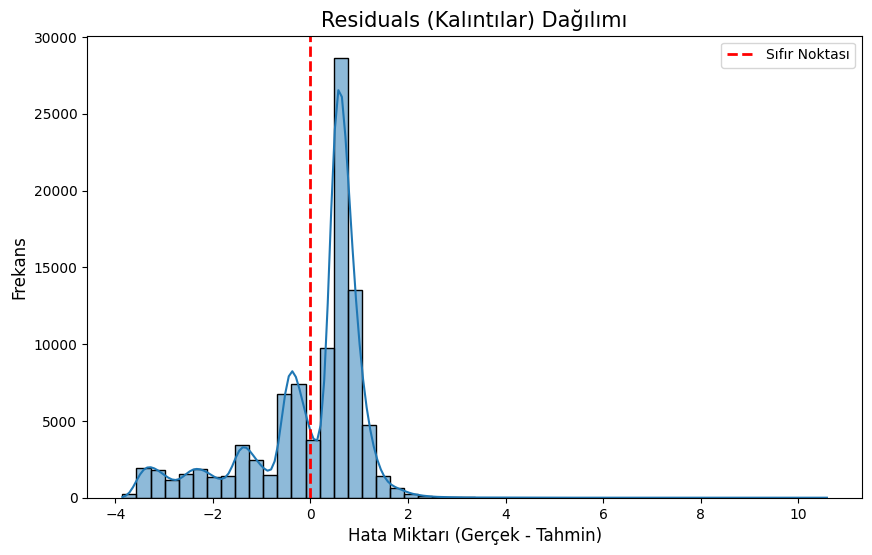

Kalıntıların Ortalaması: -0.0000000000


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histogram ve Yoğunluk Eğrisi (KDE) Çizimi
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)

# 2. Görselleştirmeyi İyileştirme
plt.title("Residuals (Kalıntılar) Dağılımı", fontsize=15)
plt.xlabel("Hata Miktarı (Gerçek - Tahmin)", fontsize=12)
plt.ylabel("Frekans", fontsize=12)

# 3. Sıfır Noktasına Referans Çizgisi Ekleme
# Kalıntıların ortalamasının 0 olması beklendiği için buraya kırmızı bir çizgi çekiyoruz.
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label="Sıfır Noktası")
plt.legend()

plt.show()

# Kalıntıların ortalamasını sayısal olarak kontrol edelim (0'a çok yakın olmalı)
print(f"Kalıntıların Ortalaması: {residuals.mean():.10f}")

❓ Kalıntıların distplot'unun neden bu kadar garip bir şekle sahip olduğunu tahmin edebilir misiniz?

*İpucu:*<br/>
👉 Aynı grafik üzerinde hem `review_score`'un dağılımını hem de `predicted_review_score`'un dağılımını çizin.

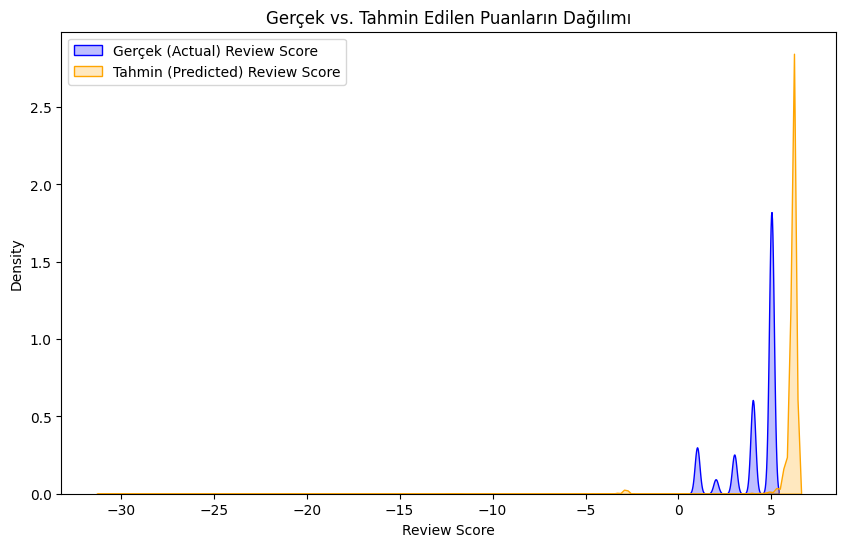

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tahminleri (y_pred) oluştur
predicted_review_score = model4.predict(orders_standardized)

# 2. Karşılaştırmalı Dağılım Grafiği (KDE Plot)
plt.figure(figsize=(10, 6))

# Gerçek Puanlar (Mavi)
sns.kdeplot(data['review_score'], label='Gerçek (Actual) Review Score', fill=True, color='blue')

# Tahmin Edilen Puanlar (Turuncu)
sns.kdeplot(predicted_review_score, label='Tahmin (Predicted) Review Score', fill=True, color='orange')

plt.title("Gerçek vs. Tahmin Edilen Puanların Dağılımı")
plt.xlabel("Review Score")
plt.legend()
plt.show()

📈 Aslında, önceki zorlukta `review_score`'un `delay_vs_expected`'e karşı `regresyon çizgisi`'ni zaten çizmiştik.

Bu çizimi yeniden görselleştirmek için aşağıdaki hücreyi çalıştırın:

(0.0, 5.931629128680382)

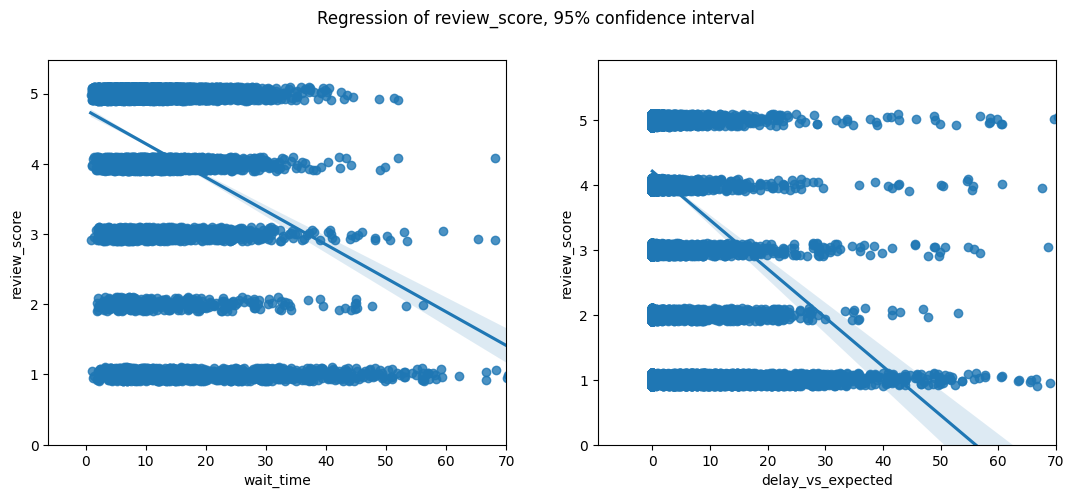

In [30]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

☝️ Bir siparişin `review_score`'unu onun `wait_time` veya `delay_vs_expected`'ine karşı regrese etmenin zor olduğunu görebilirsiniz çünkü `review_score` ayrı bir sayı olup aynı zamanda bir kategori olarak da yorumlanabilir: 1 (çok kötü), 2 (kötü), 3 (orta), 4 (iyi), 5 (mükemmel).

📅 Sonraki ünitede, adına rağmen bir `Classification Algorithm` olan yeni bir model keşfedeceksiniz: `Logistic Regression` 

☝️ Sonuç olarak, modelimiz iki nedenden dolayı o kadar harika değil:
- İlk olarak, review_scores'un önemli bir kısmını açıklamak için yeterli özelliğimiz olmadığı için (düşük R-squared)
- İkinci olarak, "doğrusal regresyon" işlevini ayrı bir sınıflandırma problemine uydurmaya çalıştığımız için

💡 Bireysel siparişler üzerinde çalışmak ve `wait_time` tabanlı ayrı `review_score`'ları açıklamaya çalışmak yerine, bir sonraki zorlukta siparişleri satıcılar tarafından toplayarak analiz edilmesini satıcı seviyesine yoğunlaştıracağız.

🏁 Harika iş!

💾 İşiniz bittiğinde bu not defterini *kaydetmeyi*, *commit* ve *push* etmeyi unutmayın!